# Part I - Ford GoBike System Data Analysis
## by Chinedu Uzorue

## Introduction
> This dataset includes information about individual rides made in a bike-sharing system covering the greater San Francisco Bay area.




## Preliminary Wrangling


This document explores a dataset about Ford Go Bikes and trip data for approximately 183,000 bikes.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [2]:
# load in the dataset into a pandas dataframe
bikes = pd.read_csv('201902-fordgobike-tripdata.csv')

## Data Assessment

In [3]:
# high-level overview of data shape and composition
print(bikes.shape)
print(bikes.dtypes)
bikes.head(10)

(183412, 16)
duration_sec                 int64
start_time                  object
end_time                    object
start_station_id           float64
start_station_name          object
start_station_latitude     float64
start_station_longitude    float64
end_station_id             float64
end_station_name            object
end_station_latitude       float64
end_station_longitude      float64
bike_id                      int64
user_type                   object
member_birth_year          float64
member_gender               object
bike_share_for_all_trip     object
dtype: object


,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes
5,1793,2019-02-28 23:49:58.6320,2019-03-01 00:19:51.7600,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,323.0,Broadway at Kearny,37.798014,-122.405950,5200,Subscriber,1959.0,Male,No
6,1147,2019-02-28 23:55:35.1040,2019-03-01 00:14:42.5880,300.0,Palm St at Willow St,37.317298,-121.884995,312.0,San Jose Diridon Station,37.329732,-121.901782,3803,Subscriber,1983.0,Female,No
7,1615,2019-02-28 23:41:06.7660,2019-03-01 00:08:02.7560,10.0,Washington St at Kearny St,37.795393,-122.404770,127.0,Valencia St at 21st St,37.756708,-122.421025,6329,Subscriber,1989.0,Male,No
8,1570,2019-02-28 23:41:48.7900,2019-03-01 00:07:59.7150,10.0,Washington St at Kearny St,37.795393,-122.404770,127.0,Valencia St at 21st St,37.756708,-122.421025,6548,Subscriber,1988.0,Other,No
9,1049,2019-02-28 23:49:47.6990,2019-03-01 00:07:17.0250,19.0,Post St at Kearny St,37.788975,-122.403452,121.0,Mission Playground,37.759210,-122.421339,6488,Subscriber,1992.0,Male,No


### What is the structure of your dataset?

> The dataset contains 183,412 rows and 16 columns. Of the 16 columns, 9 are numerical (int64 and float64 types), 7 are non-numerical (object type). It is worthy of note that some variables have the wrong data types such as the start_time and end_time, which are object types instead of datetime types.

### What is/are the main feature(s) of interest in your dataset?

> The main feature of interest for me is the trip duration and how other variables influence it. 
### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> Some features that will help me in the investigation include:user_type and member_gender as well as the member age, start_time, end_time,  user details (member_gender, member_birth_year)

In [4]:
#Check for any duplicated data
bikes.duplicated().sum()

0

In [5]:
#Check for null values
bikes.isnull().sum()

duration_sec                  0
start_time                    0
end_time                      0
start_station_id            197
start_station_name          197
start_station_latitude        0
start_station_longitude       0
end_station_id              197
end_station_name            197
end_station_latitude          0
end_station_longitude         0
bike_id                       0
user_type                     0
member_birth_year          8265
member_gender              8265
bike_share_for_all_trip       0
dtype: int64

> **Observation**: There are 8265 entries with no birthyear and/gender in our dataset, represnting less than 5% of the total data. These entries can be dropped

In [6]:
#Drop rows with null values
bikes.dropna(inplace=True)

#Check for any other null
bikes.isnull().sum()

duration_sec               0
start_time                 0
end_time                   0
start_station_id           0
start_station_name         0
start_station_latitude     0
start_station_longitude    0
end_station_id             0
end_station_name           0
end_station_latitude       0
end_station_longitude      0
bike_id                    0
user_type                  0
member_birth_year          0
member_gender              0
bike_share_for_all_trip    0
dtype: int64

In [7]:
#Convert start_time and end_time variables to datetime types
bikes.start_time = pd.to_datetime(bikes.start_time)
bikes.end_time = pd.to_datetime(bikes.end_time)

#Convert member_birth_year variable to int type
bikes.member_birth_year = bikes.member_birth_year.astype(int)

#Convert user_type variable to categorical type
bikes.user_type = bikes.user_type.astype("category")
bikes.member_gender = bikes.member_gender.astype("category")


#Convert id variables to string (object) types
ids = ['start_station_id', 'end_station_id', 'bike_id']
for bx in ids:
    bikes[bx] = bikes[bx].astype(str)

In [8]:
#Check if conversion was done
bikes.dtypes

duration_sec                        int64
start_time                 datetime64[ns]
end_time                   datetime64[ns]
start_station_id                   object
start_station_name                 object
start_station_latitude            float64
start_station_longitude           float64
end_station_id                     object
end_station_name                   object
end_station_latitude              float64
end_station_longitude             float64
bike_id                            object
user_type                        category
member_birth_year                   int64
member_gender                    category
bike_share_for_all_trip            object
dtype: object

In [9]:
#Drop any unnecessary columns
lon = ['start_station_latitude', 'start_station_longitude', 'end_station_latitude', 'end_station_longitude', 'start_station_id', 'end_station_id']
bikes.drop(lon, axis= 1, inplace=True)

In [10]:
#Perform some feature engineering on the data set
#First we extract the months from the start_time variable
bikes['start_month'] = bikes.start_time.dt.month_name()

#Next, we extract the weekdays from the start_time variable
bikes['start_weekday'] = bikes.start_time.dt.weekday 

#lastly, we extract the hour of the day from the start_time variable
bikes['hour'] = bikes.start_time.dt.hour

In [11]:
#Check the dataframe again
bikes.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174952 entries, 0 to 183411
Data columns (total 13 columns):
duration_sec               174952 non-null int64
start_time                 174952 non-null datetime64[ns]
end_time                   174952 non-null datetime64[ns]
start_station_name         174952 non-null object
end_station_name           174952 non-null object
bike_id                    174952 non-null object
user_type                  174952 non-null category
member_birth_year          174952 non-null int64
member_gender              174952 non-null category
bike_share_for_all_trip    174952 non-null object
start_month                174952 non-null object
start_weekday              174952 non-null int64
hour                       174952 non-null int64
dtypes: category(2), datetime64[ns](2), int64(4), object(5)
memory usage: 16.4+ MB


## Univariate Exploration

> In this section, I will perfrom single variable exploratory analysis on the dataset

First, I check the distribution on my variable of interest ```duration_sec```

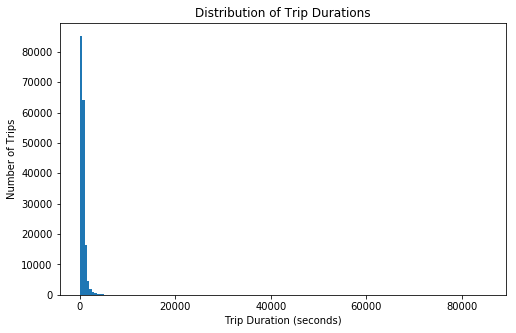

In [12]:
# start with a standard-scaled plot

binsize = 500
bins = np.arange(0, bikes['duration_sec'].max()+binsize, binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = bikes, x = 'duration_sec', bins = bins)
plt.xlabel('Trip Duration (seconds)')
plt.ylabel('Number of Trips')
plt.title('Distribution of Trip Durations')
plt.show()

>**Observation**: The trip duration is right skewed, with a long tail stretching from about 10,000 seconds to the end

To further understand the histogram, I zoom in using a log scale on the x axis

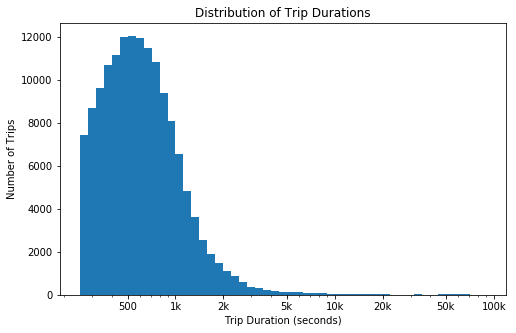

In [13]:
# there's a long tail in the distribution, so let's zoom in by using a log scale instead
log_binsize = 0.05
bins = 10 ** np.arange(2.4, np.log10(bikes['duration_sec'].max())+log_binsize, log_binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = bikes, x = 'duration_sec', bins = bins)
plt.xscale('log')
plt.xticks([500, 1e3, 2e3, 5e3, 1e4, 2e4, 5e4, 1e5], [500, '1k', '2k', '5k', '10k', '20k', '50k', '100k'])
plt.xlabel('Trip Duration (seconds)')
plt.ylabel('Number of Trips')
plt.title('Distribution of Trip Durations')
plt.show()

>**Observation**: Trip duration is right skewed from the plot above, and unimodal, with most of the trips lasting between 0 and 1500 seconds. On a log scale, we see this better as the peak duration is around 500 to 800 seconds recorded by alomst 12,000 trips.

Next, we compare the number of users by type

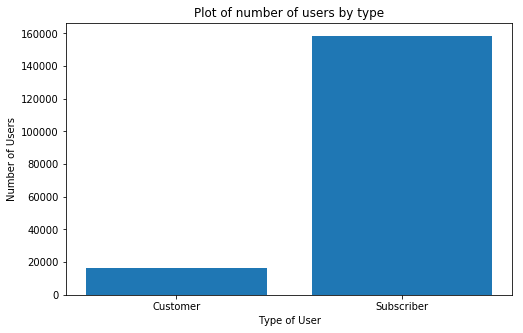

In [14]:
# plotting types of users on bar.
plt.figure(figsize=[8,5])
plt.bar(x = bikes.user_type.value_counts().keys(), height = bikes.user_type.value_counts() )
plt.xlabel('Type of User')
plt.ylabel('Number of Users')
plt.title('Plot of number of users by type')
plt.show()

>**Observation**: The bar chart shows that users with "Subscriber" type are the majority

Thirdly, we use a bar chart to see the spread of members based on their gender

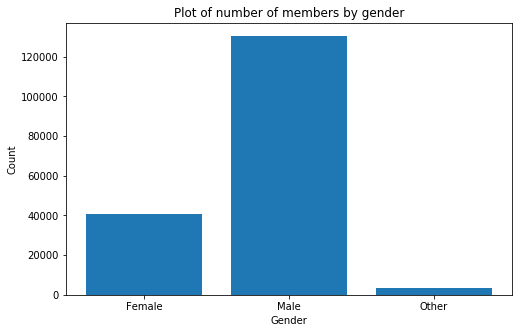

In [15]:
# plotting member gender on bar chart.
plt.figure(figsize=[8,5])
plt.bar(x = bikes.member_gender.value_counts().keys(), height = bikes.member_gender.value_counts() )
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Plot of number of members by gender')
plt.show()

>**Observation**: The bar chart shows that users with Male gender have the higest numbers and members with "Öther" gender are the least represented.

Next, we use a pie chart to check for the percentage of members that allow for bike ride sharing or not

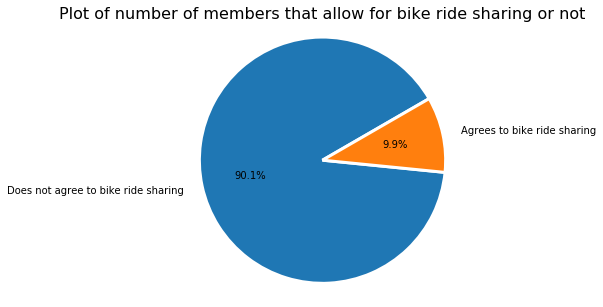

In [16]:
#plotting users that allow for bike ride sharing and those that do not
plt.figure(figsize=[8,5])
labels = ['Does not agree to bike ride sharing', 'Agrees to bike ride sharing', ]
plt.pie(x = bikes.bike_share_for_all_trip.value_counts(), labels=labels,
        labeldistance=1.15, 
        wedgeprops = { 'linewidth' : 3, 'edgecolor' : 'white' },
        radius = 1.0, startangle = 30, autopct = '%1.1f%%')
plt.title('Plot of number of members that allow for bike ride sharing or not', fontsize = 16)
plt.axis('equal')
plt.show()

>**Observation**: The bar chart shows that majority (90%) of the members do not agree to bike sharing

I am now going to create a plot of members by age distribution

In [17]:
#Plot of age distribution of members
#first, we create an age column
bikes['age'] = 2019 - bikes['member_birth_year']

In [18]:
#Next, we find the highest age to check for outlier
bikes.age.max()

141

In [19]:
#Find the median age
#I have used the median value here, because the mean is also affected by the outliers
bikes.age.quantile(0.5)

32.0

In [20]:
#Force all ages greater than 80 to the median, as these are outliers :) no 90 year old should be riding a bike
#I have used the median value here, because the mean is also affected by the outliers
bikes.loc[bikes['age']>90, 'age']=32 

In [21]:
#Check if age setting was done
bikes.age.max()

89

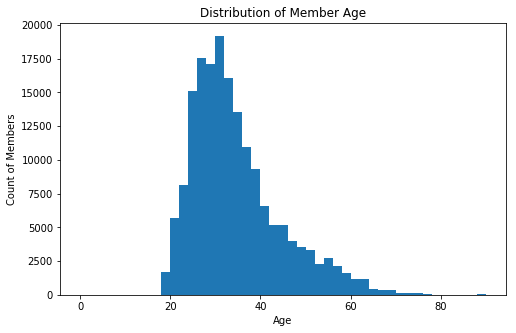

In [22]:
#next, we make the plot
binsize = 2
bins = np.arange(0, bikes['age'].max()+binsize, binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = bikes, x = 'age', bins = bins)
plt.xlabel('Age')
plt.ylabel('Count of Members')
plt.title('Distribution of Member Age')
plt.show()

>**Observation**: The age distribution is right skewed, with most of the riders falling in the 20 to 40 years age bracket

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> My variable of interest "Trip duration" has a unimodal distribution, with most of the trips lasting between 0 and 1500 seconds. Because the tail was long, I had to replot on a log scale. On a log scale, we see this better as the peak duration is around 500 to 800 seconds recorded by alomst 12,000 trips.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> I had to convert the data types of some of the variables, like the "id" variables from int/float to strings as I do not intend to perform any calculations on them. 
I also converted the start and end time variables to datetime types as that is the appropriate data type.
I dropped some columns as they may not be useful for my analysis and added some new columns like the age column to plot the age distribution of the members

## Bivariate Exploration

> In this section, I will investigate relationships between pairs of variables in the Ford Bike
dataset.

I am going to investigate the relationship between ```age``` and ```duration_sec```

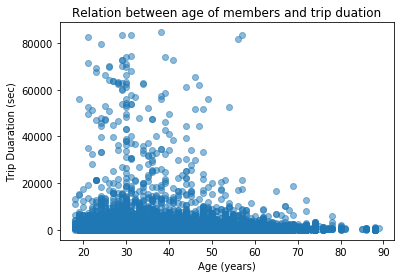

In [23]:
#Plot a scatter plot to show relationship between age of members and trip duration
plt.scatter(data = bikes, x = 'age', y = 'duration_sec', alpha = 0.5, marker = 'o')
plt.xlabel('Age (years)')
plt.ylabel('Trip Duaration (sec)')
plt.title('Relation between age of members and trip duation')
plt.show()

>**Observation**: The scatter plot shows that majority of the trips are below 20,000 seconds among the various age groups

Next, drill down to understand the relationship better

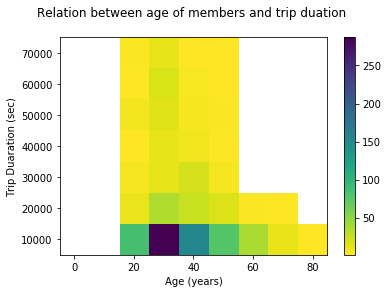

In [24]:
#Plot a heat map to drill down the relationship between age of members and trip duration

bins_x = np.arange(-5, bikes['age'].max()+1, 10)
bins_y = np.arange(5000, bikes['duration_sec'].max()+1, 10000)
plt.hist2d(data = bikes, x = 'age', y = 'duration_sec', bins = [bins_x, bins_y], cmap = 'viridis_r', cmin = 0.5)
plt.colorbar();
plt.xlabel('Age (years)')
plt.ylabel('Trip Duaration (sec)')
plt.title('Relation between age of members and trip duation \n')
plt.show()

>**Observation**: The heat map shows that members in the age bracket of 20 to 40 have the most trip duration. The darker the shade, the greater the correlation

What is the relationship between ```duration_sec``` and ```user_type```

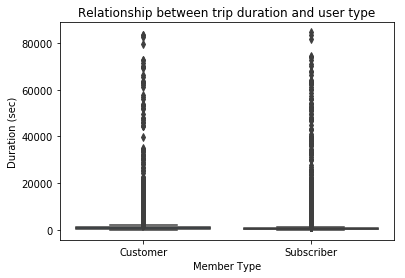

In [25]:
#Relationship between trip duration and user type
sb.boxplot(x="user_type", y="duration_sec", data=bikes)
plt.xlabel('Member Type')
plt.ylabel('Duration (sec)')
plt.title('Relationship between trip duration and user type')
plt.show()

>**Observation**: The plots are very wide apart, we need to introduce a limit to zoom into the plot

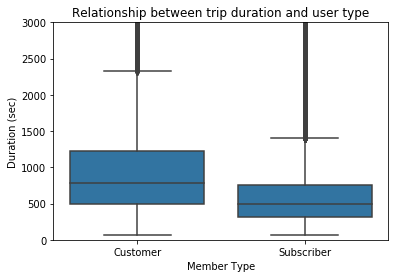

In [26]:
#Relationship between trip duration and user type
sb.boxplot(x="user_type", y="duration_sec", data=bikes, color = sb.color_palette()[0])
plt.xlabel('Member Type')
plt.ylabel('Duration (sec)')
plt.title('Relationship between trip duration and user type')
plt.ylim([0, 3000])
plt.show()

>**Observation**: Members with "Customer" member type go on rides for longer duration than members that are "Subscribers"

Now I am going to use a plot matrix to see the relationship between numeric features (```duration_sec``` and ```age```) and categorical features (```member_gender``` and ```user_type```)

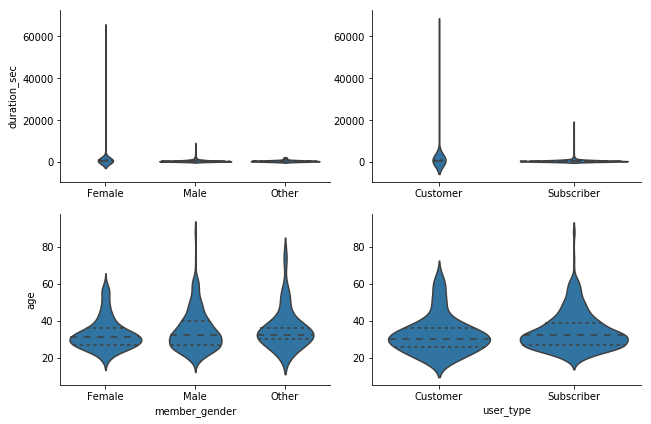

In [27]:
# correlation plot
# plot matrix of numeric features against categorical features.

bikes_samp = bikes.sample(n=1000, replace = False)
categoric_vars = ['member_gender', 'user_type']

def boxgrid(x, y, **kwargs):
    """ Quick hack for creating box plots with seaborn's PairGrid. """
    default_color = sb.color_palette()[0]
    sb.violinplot(x=x, y=y, color=default_color, inner = 'quartile')

plt.figure(figsize = [10, 10])
g = sb.PairGrid(data = bikes_samp, y_vars = ['duration_sec', 'age'], x_vars = categoric_vars,
                size = 3, aspect = 1.5)
g.map(boxgrid)
plt.show();

>**Observation**: It is interesting to note that female members have a slightly higher trip duration than males and "other" gender

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> There is a somewhat weak correlation between the age of a member and the trip duration, although most of the members with high trip duration are in the 20 to 40 years old age group. 
There was also an interesting relationship observed between trip duration and member user type. Members with "Customer" member type go on rides for longer duration than members that are "Subscribers".
Lastly, I observed that female members have a higher trip duration than males and "other" gender

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> Expected relationships were found in the association between 'age' and 'duration_sec' variables. There is also an intersting relationship between age and member gender as well as user type.

## Multivariate Exploration

Here, I will continue to explore the relationship between the categorical variables against the numerical variables

I am going to start with a facetgrid plot (scatter plot) of ```age``` and ```duration_sec``` against ```member_gender```

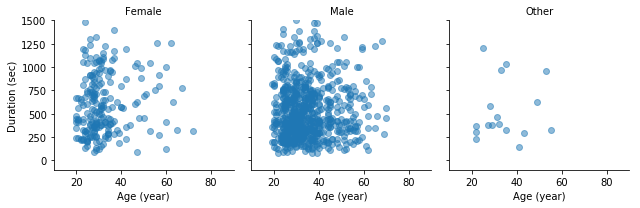

In [28]:
#Multivariate plot of Trip duration, age, and Member gender
plt.figure(figsize=[100,50])

#I use a sample of 1000 observations to prevent overplotting as the dataset is quite large
bikes_samp = bikes.sample(n=1000, replace = False)

g = sb.FacetGrid(data = bikes_samp, col = 'member_gender', col_wrap = 3, xlim = [10, 90], ylim = [-100, 1500])
g.map(plt.scatter, 'age', 'duration_sec', alpha= 0.5, marker='o')
g.set_xlabels('Age (year)')
g.set_ylabels('Duration (sec)')
g.set_titles('{col_name}')
plt.show()

>**Observation**: There is a strong correlation between members of the male gender, especially those between 20 and 40 years of age and trip duration. There is a scanty correlation between members of "other" gender and the trip duration

I want to define a function to plot barplots that I will need later on 

In [29]:
#function to plot barplot

def bpf(x,y,h):
    plt.figure(figsize=[12, 8])
    ax = sb.barplot(x=x, y=y, hue=h, 
                    data=bikes, ci = None)

Now, I plot a barplot of ```member_gender```, ```duration_sec``` and ```user_type```

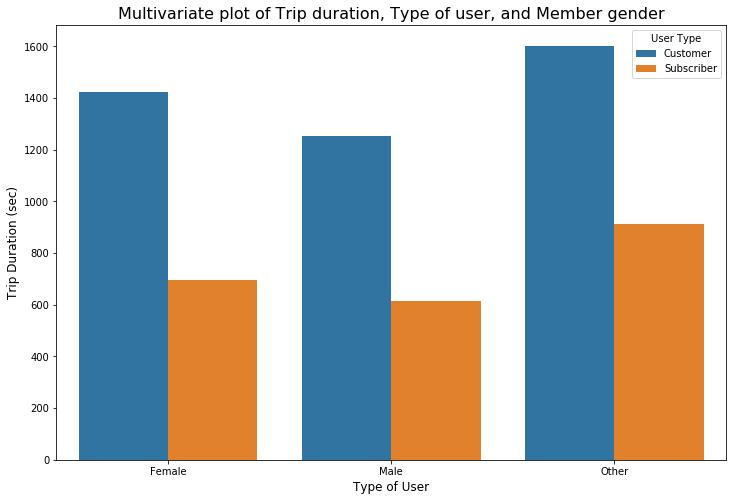

In [30]:
#Multivariate plot of Trip duration, Type of user, and Member gender
plt.figure(figsize=[12, 8])

#call function to plot bar plot
bpf('member_gender','duration_sec','user_type')

#modify plot labels and title
plt.xlabel('Type of User', fontsize=12)
plt.ylabel('Trip Duration (sec)', fontsize=12)
plt.title('Multivariate plot of Trip duration, Type of user, and Member gender', fontsize=16)
plt.legend(title = 'User Type')
plt.show();

>**Observation**: Interestingly, members with gender "Other" have the highest trip duration among the 3 genders

Next I will check which weekday has the highest trip duration by user types

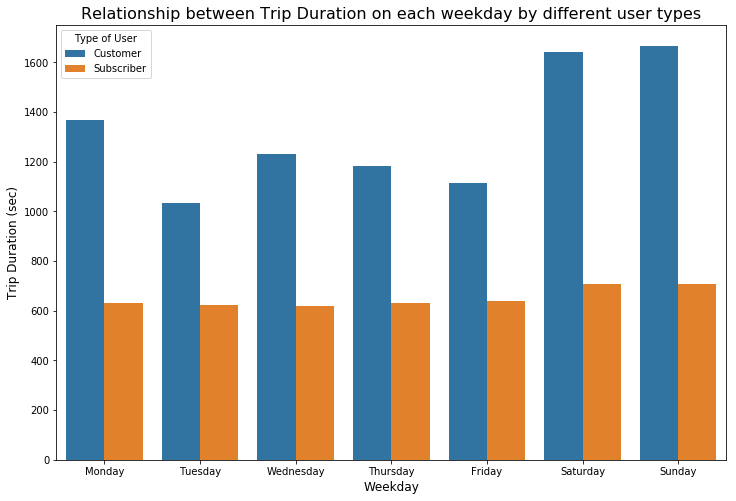

In [31]:
#Plot of Relationship between Trip Duration on each weekday by different user types
plt.figure(figsize=[12, 8])

#call function to plot bar plot
bpf('start_weekday','duration_sec','user_type')

#modify plot labels and title
plt.xlabel('Weekday', fontsize=12)
plt.ylabel('Trip Duration (sec)', fontsize=12)
plt.title('Relationship between Trip Duration on each weekday by different user types', fontsize=16)
plt.xticks([0,1,2,3,4,5,6],['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.legend(title = 'Type of User')
plt.show();

>**Observation**: The plot above shows that the longest trip duration for "Customer" member types happens over the weekends, especially on Sundays and similary for "Subscriber"member types

Which gender allows more for bike ride sharing and their age distribution

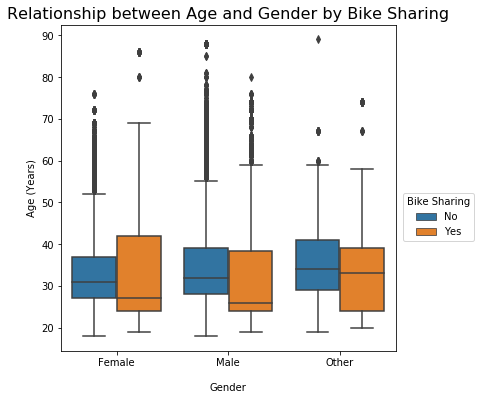

In [32]:
#Plot of gender against age by bike sharing

plt.figure(figsize=[6,6])
sb.boxplot(data=bikes,x='member_gender',y='age',hue='bike_share_for_all_trip')
plt.xlabel('Gender', labelpad=15)
plt.ylabel('Age (Years)')
plt.title('Relationship between Age and Gender by Bike Sharing', fontsize=16)
plt.legend(title='Bike Sharing', bbox_to_anchor=(1.25,0.5))
plt.show();

>**Observation**: For all three genders, members who opt for bike sharing have a lower median than those who do not. The interquartile range is also wider for members who opt for bike sharing among the three genders. In addition, members who are male have the most outliers

My last plot/chart will investigate the relationship between trip duration on each hour of a day and the different genders

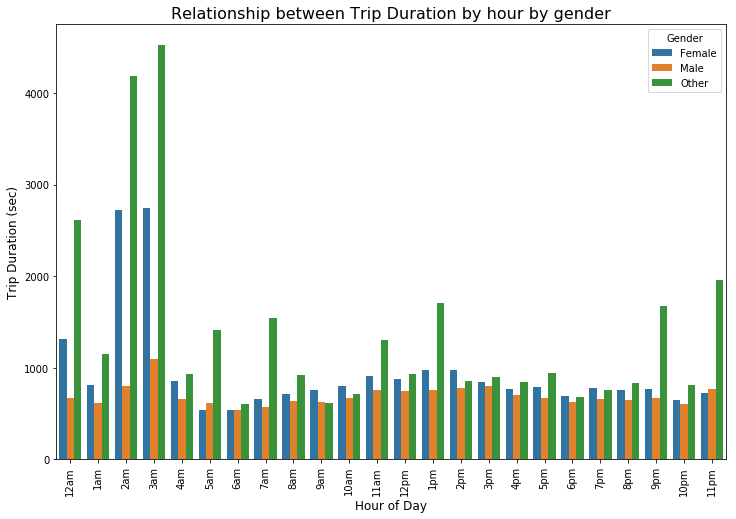

In [33]:
#Plot of Relationship between Trip Duration on each hour by different gender types
plt.figure(figsize=[12, 8])

#call function to plot bar plot
bpf('hour','duration_sec','member_gender')

#modify plot labels and title
plt.xlabel('Hour of Day', fontsize=12)
plt.ylabel('Trip Duration (sec)', fontsize=12)
plt.title('Relationship between Trip Duration by hour by gender', fontsize=16)
plt.xticks([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23],
['12am', '1am', '2am', '3am', '4am','5am', '6am', '7am', 
 '8am', '9am', '10am', '11am', '12pm', '1pm', '2pm', '3pm', '4pm','5pm','6pm','7pm','8pm','9pm','10pm','11pm' ], rotation = 90)
plt.legend(title = 'Gender')
plt.show();

>**Observation**: The longest trip starts at 3am by members of "Other" gender

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> I continued my investigation of trip duration, along with age against some categorical variables in this section. From the multivariate exploration, I can confirm that there is a positive relationship between member gender and trip duration, as well as member age and trip duration. In using a scatterplot to check for the relationship between trip durattion, age, and member gender, I had to reduce the sample size so as to prevent overplotting as the dataset was quite large. 

### Were there any interesting or surprising interactions between features?

> Yes, there were actually. For one, members with gender "Other" have the highest trip duration among the 3 genders <br />
For another, majority of the trips start very early in the morning

## Conclusions
> To sum up this phase of exploratory data analysis, I have sieved through the data, by assessing, cleaning, and wrangling the data. I went ahead to plot various charts to show the relationships/dependencies of some variables (categorical and numerical), with my variable of interest being trip duration (`duration_sec`). Several insights were drawn from this phase as summarized below: <br />

**UNIVARIATE EXPLORATORY ANALYSIS**:
 - <u>Observation 1</u>: The trip duration is right skewed, with a long tail stretching from about 10,000 seconds to the end
 - <u>Observation 2</u>: Trip duration is right skewed from the plot above, and unimodal, with most of the trips lasting between 0 and 1500 seconds. On a log scale, we see this better as the peak duration is around 500 to 800 seconds recorded by alomst 12,000 trips.
 - <u>Observation 3</u>: The "Plot of number of users by type" bar chart shows that users with "Subscriber" type are the majority
 - <u>Observation 4</u>: The "Plot of number of members by gender" bar chart shows that users with Male gender have the higest numbers and members with "Öther" gender are the least represented.
 - <u>Observation 5</u>: The "Plot of number of members that allow for bike ride sharing or not" shows that majority of the members do not agree to bike sharing

 - <u>Observation 6</u>: For the "Distribution of Member Age" plot, the age distribution is right skewed, with most of the riders falling in the 20 to 40 years age bracket
 
**BIVARIATE EXPLORATORY ANALYSIS**:
 - <u>Observation 7</u>: The scatter plot shows that majority of the trips are below 20,000 seconds among the various age groups
 - <u>Observation 8</u>: The heat map shows that members in the age bracket of 20 to 40 have the most trip duration. The darker the shade, the greater the correlation

 - <u>Observation 9</u>: The "Relationship between trip duration and user type" box plots are very wide apart, we need to introduce a limit to zoom into the plot. After re-plotting, it was observed that Members with "Customer" member type go on rides for longer duration than members that are "Subscribers"

 - <u>Observation 10</u>: It is interesting to note that female members have a slightly higher trip duration than males and "other" gender

**MULTIVARIATE EXPLORATORY ANALYSIS**:
 - <u>Observation 11</u>: There is a strong correlation between members of the male gender, especially those between 20 and 40 years of age and trip duration. There is a scanty correlation between members of "other" gender and the trip duration
 - <u>Observation 12</u>: Interestingly, members with gender "Other" have the highest trip duration among the 3 genders
 - <u>Observation 13</u>: The plot above shows that the longest trip duration for "Customer" member types happens over the weekends, especially on Sundays and similary for "Subscriber"member types
 - <u>Observation 14</u>: For all three genders, members who opt for bike sharing have a lower median than those who do not. The interquartile range is also wider for members who opt for bike sharing among the three genders. In addition, members who are male have the most outliers
 - <u>Observation 15</u>: The longest trip starts at 3am by members of "Other" gender


**Other Important Points**:
 - My variable of interest "Trip duration" has a unimodal distribution, with most of the trips lasting between 0 and 1500 seconds. Because the tail was long, I had to replot on a log scale. On a log scale, we see this better as the peak duration is around 500 to 800 seconds recorded by alomst 12,000 trips.

 - I had to convert the data types of some of the variables, like the "id" variables from int/float to strings as I do not intend to perform any calculations on them. I also converted the start and end time variables to datetime types as that is the appropriate data type. I dropped some columns as they may not be useful for my analysis and added some new columns like the age column to plot the age distribution of the members

In [34]:
#Export the new dataframe into a new csv file named 'clean_bikes.csv'
bikes.to_csv('clean_bikes.csv', index=False)